<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/CH4_Root_Finding_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Examples of root finding problems

# PROBLEM 1 
Find E where PsiRight = 0.  Need EVERY root between E= 0 and 50

In [2]:
def IntegrateTISE(x,V,E,psi0=0,psi1=1e-6):
  '''
  Uses eq (2.7) to calculate Psi by integrating the TISE
  INPUT: x and V arrays, energy E, psi0=psi[0]=psi at x[0], psi1=psi[1]
  RETURNS: psi array
  '''
# INITIALIZE
  psi = np.zeros_like(x)
  psi[0] = psi0
  psi[1] = psi1
  dx = x[1] - x[0]
  N = len(x)

  # MAIN LOOP
  for i in range(2,N):
    thisPsi = psi[i-1]
    lastPsi = psi[i-2]
    psi[i] = 2*thisPsi*(1 - dx**2 * (E-V[i])) - lastPsi # eq 2.7
              
  return psi

In [3]:
def PsiRight(E, x, V):  # return only the last psi for root finding
  psi = IntegrateTISE(x,V,E)
  return psi[-1]

In [4]:
xMax = 1.5
dx = 0.001
x = np.arange(-xMax,xMax+dx,dx)
V = 50*np.heaviside(np.abs(x)-0.5,1) # Heaviside=0 for x<0, 1 for x>0

In [5]:
PsiRight(10,x,V)

-3172.798295974798

In [6]:
PsiRight(20,x,V)

347.71096245619435

# SOLUTIONS

My best advice:
## PLOT the FUNCTION

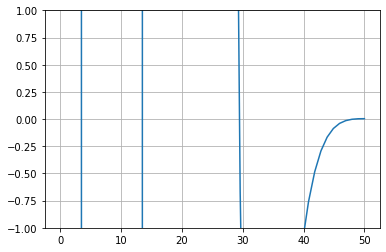

In [7]:
E = np.linspace(0,50)
y = np.zeros_like(E)
for i in range(len(E)):
  e = E[i]
  y[i] = PsiRight(e,x,V)

plt.plot(E,y)
plt.ylim(-1,1)
plt.grid()

In [8]:
from scipy.optimize import root_scalar

In [9]:
root_scalar(PsiRight, args=(x,V), bracket=[1,5] )

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 3.4135557441253193

In [10]:
root_scalar(PsiRight, args=(x,V), bracket=[10,15] )

      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 13.475651827468985

In [11]:
root_scalar(PsiRight, args=(x,V), x0=13, x1=14 )

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 13.475651827489223

In [12]:
root_scalar(PsiRight, args=(x,V), bracket=[25,30] )

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 29.452156557535297

In [13]:
root_scalar(PsiRight, args=(x,V), bracket=[40,50] )

      converged: True
           flag: 'converged'
 function_calls: 29
     iterations: 28
           root: 48.227034323456806